In [61]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.colors as ListedColormap

In [62]:
auto_data = pd.read_csv('auto-mpg.csv')
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [63]:
auto_data.shape

(398, 9)

In [64]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [65]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [66]:
auto_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [67]:
auto_data.horsepower = auto_data.horsepower.fillna(auto_data.horsepower.mean()) #imputing

In [68]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [69]:
print(*auto_data.columns,sep =' | ')

mpg | cylinders | displacement | horsepower | weight | acceleration | model year | origin | car name


In [70]:
feat = auto_data.columns
feat = feat.drop(['car name','origin'])

In [71]:
x=auto_data[feat]
y=auto_data.origin

In [72]:
x

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [73]:
y

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [74]:
x.shape

(398, 7)

In [75]:
y.shape

(398,)

In [76]:
feat

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

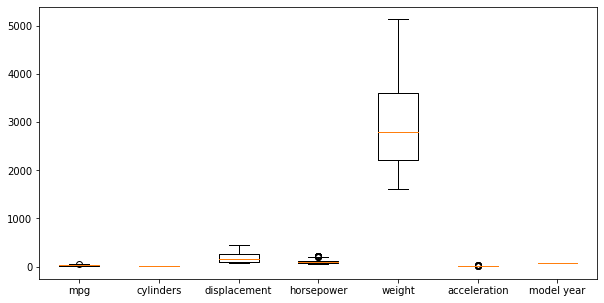

In [77]:
plt.figure(figsize=(10,5))
plt.boxplot(x,labels=feat)
plt.show()

In [81]:
scl = MinMaxScaler()

In [82]:
x = scl.fit_transform(x)

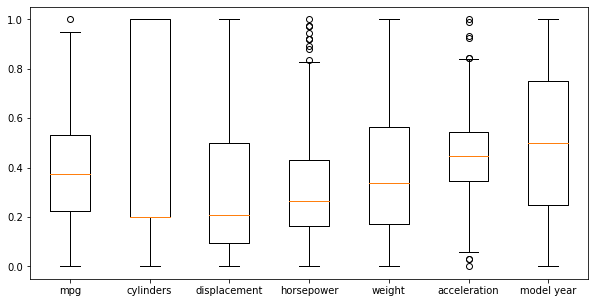

In [83]:
plt.figure(figsize=(10,5))
plt.boxplot(x,labels=feat)
plt.show()

In [85]:
target_ration = y.value_counts()/len(y)
print(target_ration)

1    0.625628
3    0.198492
2    0.175879
Name: origin, dtype: float64


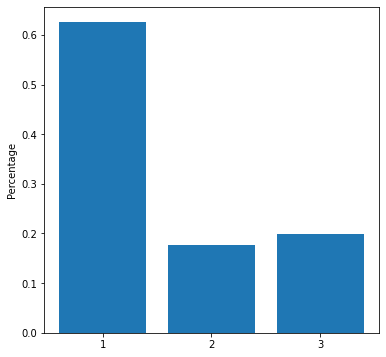

In [87]:
#cheaking for the data unbalanced
plt.figure(figsize=(6,6))
plt.bar(target_ration.index,target_ration)
plt.ylabel('Percentage')
plt.xticks(target_ration.index)
plt.show()

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [90]:
x_train.shape

(278, 7)

In [91]:
y_train.shape

(278,)

In [92]:
x_test.shape

(120, 7)

In [93]:
y_test.shape

(120,)

# K - Nearest Neighbor
Key hyperparameters to be considered before applying the KNN algorithm:

n_neighbors: Integer value to determine the number of neighbors to use by default it is 5.
For more information about other hyperparameters see KNN section in the documentation here.

In [97]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn6.fit(x_train,y_train)
knn3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
pred  = knn6.predict(x_test)
acc_gnd = accuracy_score(y_test,pred)
acc_gnd

0.75

In [103]:
pred  = knn3.predict(x_test)
acc_gnd = accuracy_score(y_test,pred)
acc_gnd

0.7

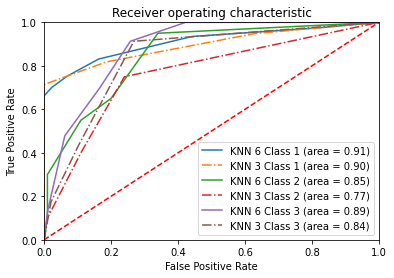

In [105]:
knn6_prob=knn6.predict_proba(x_test).T
knn3_prob=knn3.predict_proba(x_test).T

dummy_y_test=pd.get_dummies(y_test)

knn6_roc_auc=dict()
knn3_roc_auc=dict()
lfpr6=dict()
ltpr6=dict()
lfpr3=dict()
ltpr3=dict()
lthresholds6=dict()
lthresholds3=dict()
for i in dummy_y_test.columns:
    knn6_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn6_prob[i-1])
    knn3_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn3_prob[i-1])
    lfpr6[i], ltpr6[i], lthresholds6[i] = roc_curve(dummy_y_test[i], knn6_prob[i-1])
    lfpr3[i], ltpr3[i], lthresholds3[i] = roc_curve(dummy_y_test[i], knn3_prob[i-1])


for i in dummy_y_test.columns:
    plt.plot(lfpr6[i], ltpr6[i], label='KNN 6 Class '+str(i)+ ' (area = %0.2f)' % knn6_roc_auc[i])
    plt.plot(lfpr3[i], ltpr3[i],'-.', label='KNN 3 Class '+str(i)+ ' (area = %0.2f)' % knn3_roc_auc[i])



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()